

<h2 align="center">Data Science Lab: Process and Methods</h2>
<h2 align="center">Politecnico di Torino</h2>
<h2 align="center">Project Assignment June Call, A.Y. 2022/2023</h2>

    
        Target = Carbon monoxide (CO) 
                
        • Aim goal : I built a regression pipeline to predict CO emission of each Gas-Turbine in the evaluation set.
    
<div style="text-align:center">
    <img src="turbine.png" alt="Texte de remplacement" width="600"/>
</div>


In [90]:
import time
import logging
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
from pathlib import Path
from pprint import pprint
from pandas import read_csv
from datetime import datetime
import matplotlib.pyplot as plt

# File system manangement
import os
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Sklearn processing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler, OneHotEncoder
from sklearn.model_selection import  StratifiedShuffleSplit,ShuffleSplit,RepeatedStratifiedKFold,StratifiedKFold

# Sklearn regression algorithms regression models.
from time import time
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,LinearRegression,Lasso
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor

# Sklearn regression algorithms
# Sklearn regression model evaluation functions
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

# About Dataset:
A gas turbine is largely used to generate electricity around the world. In recent years, the awareness of greenhouse gases is raised and the emissions of the gas- turbines are controlled at certain limits according to the environmental regulations.

Aim of Homework : Building a machine learning model that can precisely estimate the volume of carbon monoxide (CO) emitted by a gas turbine is the goal of this project.

# Load Gas-Turbine CO Emission Data:

In [91]:
path = "/Users/surelmanda/Downloads/AirGUARD/Gas_Turbine_Streaming/gas_turbine_full.csv"
# load all data from file that we will use for your homework
data = pd.read_csv(path,sep=',')


print("Shape of the original dataset: ")
print('data_Train.shape :' ,data.shape)

# resetting index
data.reset_index(inplace = True,drop=True)
# sort by index labels
data.sort_index(axis = 0,inplace = True) 
#
display(data.head())

print("list of features in the dataset:", list(data.columns))

Shape of the original dataset: 
data_Train.shape : (36733, 12)


,Unnamed: 0,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,2,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,4,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,5,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


list of features in the dataset: ['Unnamed: 0', 'AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']


In [92]:
# Renommer les colonnes spécifiées
data = data.rename(columns={'Unnamed: 0': 'Id'})
display(data.head())

,Id,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,2,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,4,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,5,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [230]:
data.columns.tolist()

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']

# Check Any Missing values and Handling Missing values

In [93]:
# Vérifier si des colonnes ont des valeurs nulles
null_columns = data.columns[data.isnull().any()]
if null_columns.empty:
    print("Aucune colonne avec des valeurs nulles.")
else:
    # Calculer et afficher les informations sur les valeurs nulles
    total = data[null_columns].isnull().sum().sort_values(ascending=False)
    percent = total / len(data) * 100
    news = pd.concat([total, percent], axis=1, keys=['Total', 'Percent(%)'])
    display(news)

Aucune colonne avec des valeurs nulles.


# Separate numeric and categorical variables

In [94]:
# Supprimer la colonne 'Id'
data.drop(['Id'], axis=1, inplace=True)

# Séparer les variables numériques et catégorielles
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])

print("Partie 1. Numérique")
numeric_columns = list(numeric_data.columns)
if numeric_columns:
    print('Colonnes numériques : ', numeric_columns)
    print('Forme des variables numériques :', numeric_data.shape)
else:
    print("Aucune variable numérique disponible.")
print("")

print("Partie 2. Catégorique")
categorical_columns = list(categorical_data.columns)
if categorical_columns:
    print('Colonnes catégoriques : ', categorical_columns)
    print('Forme des variables catégoriques :', categorical_data.shape)
else:
    print("Aucune variable catégorique disponible.")

Partie 1. Numérique
Colonnes numériques :  ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']
Forme des variables numériques : (36733, 11)

Partie 2. Catégorique
Aucune variable catégorique disponible.


# Exploratory Data Analysis

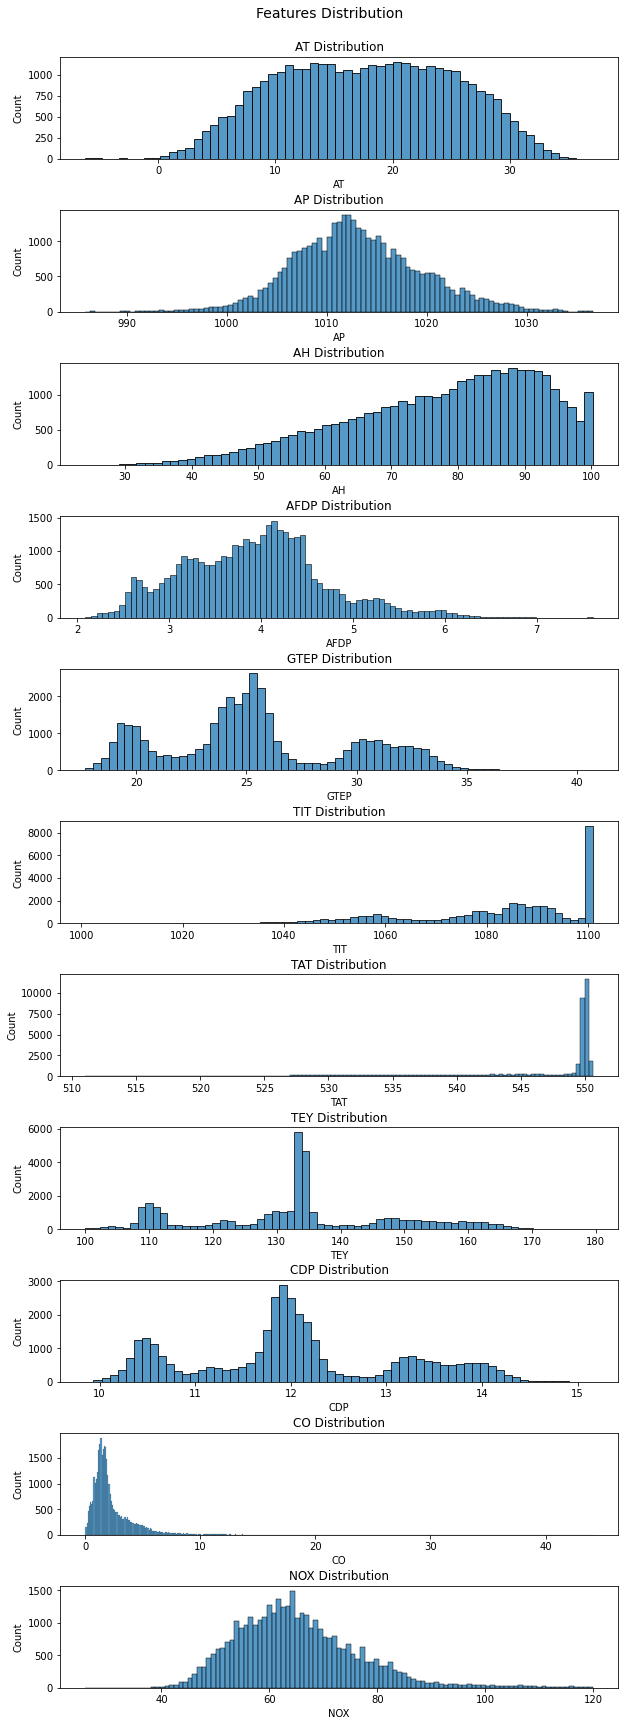

In [95]:
def plot_numeric_distributions(data):
    cols = data.columns

    # Créer la disposition des sous-graphiques
    fig, axes = plt.subplots(len(cols), 1, figsize=(10, 30))

    # Boucler sur les colonnes numériques
    for i, col in enumerate(cols):
        sns.histplot(x=col, data=data, ax=axes[i])
        axes[i].set_ylabel("Count")
        axes[i].set_title(f"{col} Distribution")

    fig.text(0.5, 0.9, "Features Distribution", va="center", ha="center", fontsize=14)
    plt.subplots_adjust(hspace=0.5)
    plt.show()

plot_numeric_distributions(numeric_data)


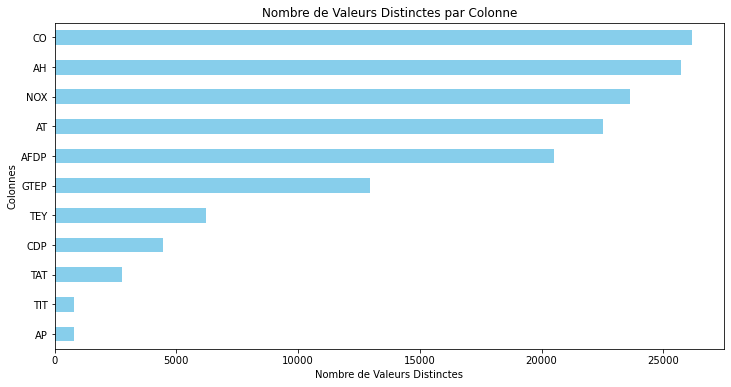

In [131]:
def visualize_unique_values(data):
    """
    Calcule le nombre de valeurs distinctes de chaque colonne d'un DataFrame et les visualise avec Matplotlib.

    Args:
    data (DataFrame): Le DataFrame dont vous souhaitez visualiser les valeurs distinctes.
    """
    # Calculer le nombre de valeurs distinctes pour chaque colonne
    unique_values_count = data.nunique()

    # Créer un graphique à barres
    plt.figure(figsize=(12, 6))
    unique_values_count.sort_values().plot(kind='barh', color='skyblue')
    
    # Ajouter des étiquettes au graphique
    plt.title("Nombre de Valeurs Distinctes par Colonne")
    plt.xlabel("Nombre de Valeurs Distinctes")
    plt.ylabel("Colonnes")
    
    # Afficher le graphique
    plt.show()

visualize_unique_values(numeric_data)


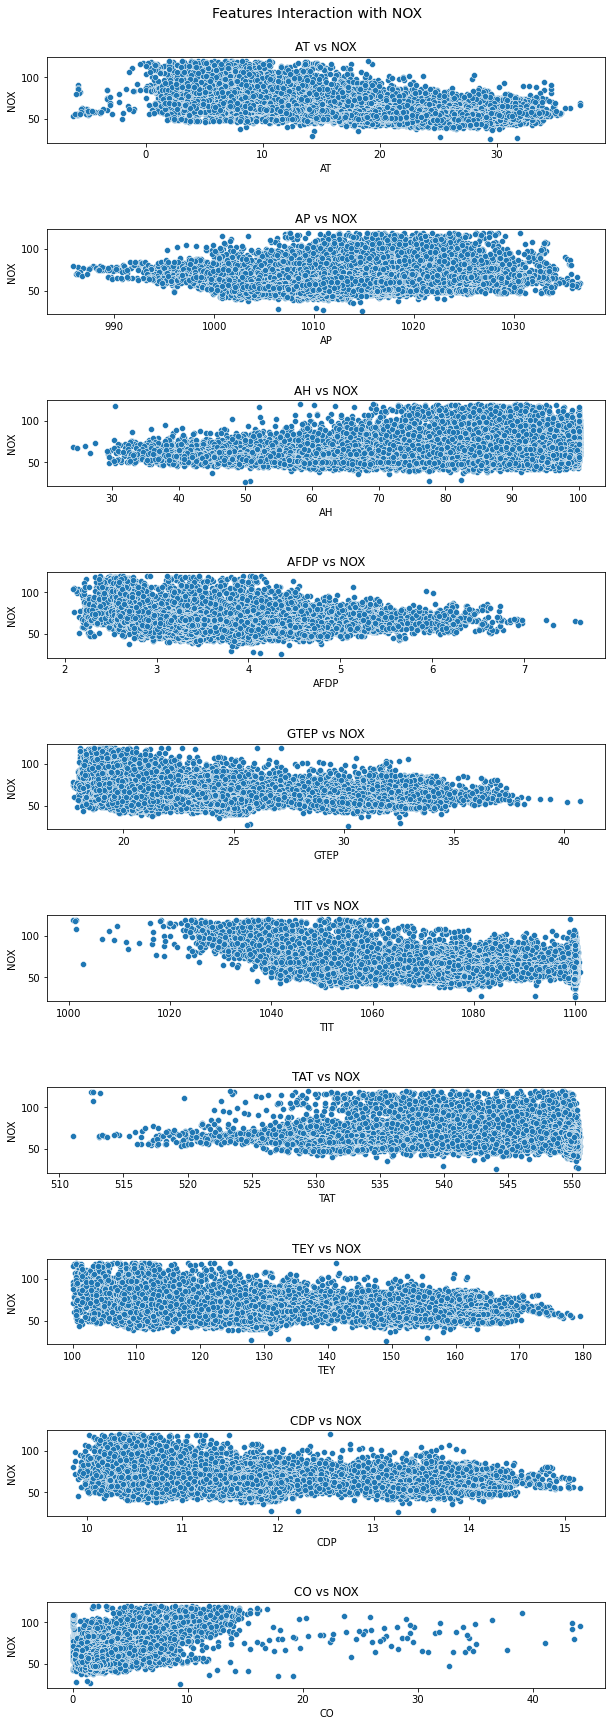

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_features_vs_nox(data):
    cols = data.columns

    # Créer la disposition des sous-graphiques
    fig, axes = plt.subplots(len(cols) - 1, 1, figsize=(10, 30))

    # Boucler sur les colonnes (à l'exception de la dernière)
    for i, col in enumerate(cols[:-1]):
        # Afficher le scatter plot pour la colonne actuelle par rapport à "NOX"
        sns.scatterplot(x=col, y="NOX", data=data, ax=axes[i])
        axes[i].set_ylabel("NOX")
        axes[i].set_title(f"{col} vs NOX")

    fig.text(0.5, 0.9, "Features Interaction with NOX", va="center", ha="center", fontsize=14)
    plt.subplots_adjust(hspace=1)
    plt.show()

# Exemple d'utilisation :
# Supposons que data soit votre DataFrame
plot_features_vs_nox(data)


# Detection and treatment of outliers in numerical data

In [97]:
#Method 1: Detecting and Treating Outliers
#Removing outliers from data using Python and Pandas
def get_iqr_values_Specifying_quartile(df_in, col_name,first_quartile,third_quartile):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(first_quartile) # xth percentile / 1st quartile
    q3 = df_in[col_name].quantile(third_quartile) # yth percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text_Specifying_quartile(df_in, col_name,first_quartile,third_quartile):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values_Specifying_quartile(df_in, col_name,first_quartile,third_quartile)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers_Specifying_quartile(df_in, col_name,first_quartile,third_quartile):
    _, _, _, _, minimum, maximum = get_iqr_values_Specifying_quartile(df_in, col_name,first_quartile,third_quartile)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

def count_outliers_Specifying_quartile(df_in, col_name,first_quartile,third_quartile):
    _, _, _, _, minimum, maximum = get_iqr_values_Specifying_quartile(df_in, col_name,first_quartile,third_quartile)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def box_and_whisker_Specifying_quartile(df_in, col_name,first_quartile,third_quartile):
    title = get_iqr_text_Specifying_quartile(df_in, col_name,first_quartile,third_quartile)
    #plt.figure(figsize=(5, 3))
    plt.figure(figsize=(16,8))
    sns.boxplot(df_in[col_name])
    plt.title(title)
    plt.show()

#Replacing Outliers with nan Values
def Replace_Outliers_with_nan_Specifying_quartile(df_in, col_name,first_quartile,third_quartile):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values_Specifying_quartile(df_in, col_name,first_quartile,third_quartile)
    df_in.loc[df_in[col_name] < minimum,col_name] = np.nan
    df_in.loc[df_in[col_name] > maximum,col_name] = np.nan
    return df_in

In [98]:
def get_outliers_information(data, q1=0.25, q3=0.75):
    """
    Cette fonction génère des informations sur les outliers pour chaque colonne numérique.

    :param data: DataFrame, le jeu de données
    :param q1: float, le premier quartile (0-1)
    :param q3: float, le troisième quartile (0-1)
    :return: DataFrame, informations sur les outliers
    """
    dim = data.shape[0]
    number_outliers = []
    number_no_outliers = []
    percentale_of_outliers = []
    columns_with_outliers = []

    for feature_name in data.columns.tolist():
        numbers = count_outliers_Specifying_quartile(data, feature_name, q1, q3)
        if numbers > 0:
            columns_with_outliers.append(feature_name)
            number_outliers.append(numbers)
            percentale_of_outliers.append(np.round((numbers / dim) * 100, 3))
            number_no_outliers.append(dim - numbers)

    # Créer le DataFrame
    informations = {
        'Name_of_columns': columns_with_outliers,
        'number_outliers': number_outliers,
       # 'number_not_outliers': number_no_outliers,
        'Percentale_of_outliers(%)': percentale_of_outliers
    }
    df_informations = pd.DataFrame(informations)

    # Trier le DataFrame par pourcentage d'outliers
    df_informations.sort_values(by=['Percentale_of_outliers(%)'], inplace=True, ascending=False)

    return df_informations

In [99]:

outliers_information = get_outliers_information(numeric_data, q1=0.25, q3=0.75)
print(outliers_information)

   Name_of_columns  number_outliers  Percentale_of_outliers(%)
6              TAT             4955                     13.489
9               CO             2655                      7.228
10             NOX              936                      2.548
1               AP              612                      1.666
3             AFDP              557                      1.516
5              TIT              318                      0.866
2               AH              132                      0.359
7              TEY               33                      0.090
8              CDP               10                      0.027
4             GTEP                7                      0.019
0               AT                1                      0.003


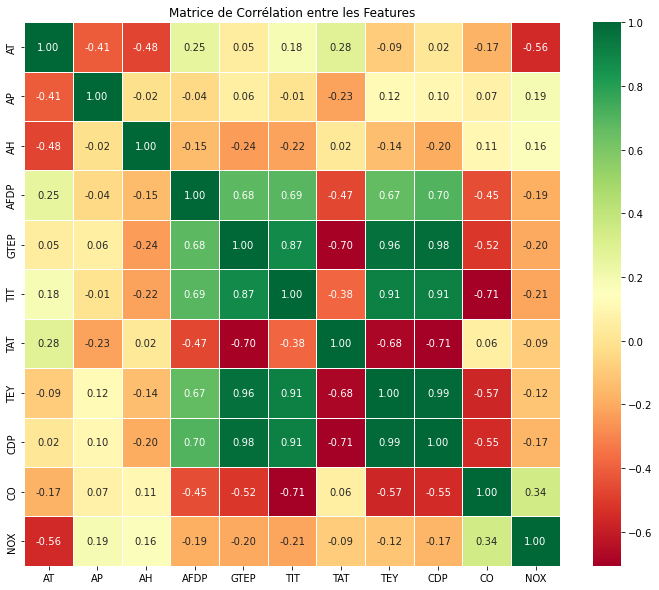

In [197]:
def visualiser_correlations(data):
    """
    Affiche les corrélations entre les différentes features d'un DataFrame.

    Args:
    data (DataFrame): Le DataFrame dont vous souhaitez visualiser les corrélations.
    """
    # Calculer la matrice de corrélation
    corr_matrix = data.corr()

    # Générer un heatmap avec seaborn
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', fmt='.2f', linewidths=.5) #cmap='RdYlGn'
    
    # Ajouter des étiquettes au graphique
    plt.title("Matrice de Corrélation entre les Features")
    
    # Afficher le graphique
    plt.show()

visualiser_correlations(numeric_data)


In [224]:
import pandas as pd

def high_correlation_features(dataframe, threshold=0.6):
    # Calculer la matrice de corrélation
    corr_matrix = dataframe.corr().abs()  # Get absolute correlations

    # Initialiser la liste des paires de fonctionnalités avec une corrélation supérieure au seuil
    high_corr_pairs = set()

    # Filtrer les paires de fonctionnalités avec une corrélation supérieure au seuil
    for feature1 in corr_matrix.columns:
        for feature2 in corr_matrix.columns:
            if (feature1 != feature2) and (abs(corr_matrix.loc[feature1, feature2]) > threshold):
                # Tri des noms des fonctionnalités dans la paire pour éviter les doublons
                pair = tuple(sorted([feature1, feature2]))
                high_corr_pairs.add(pair + (corr_matrix.loc[feature1, feature2],))

    # Créer un dataframe à partir de l'ensemble filtré
    high_corr_df = pd.DataFrame(high_corr_pairs, columns=['feature1', 'feature2', 'correlation'])

    return high_corr_df

resultat_correlation = high_correlation_features(numeric_data[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO']], 0.8)
display(resultat_correlation)


,feature1,feature2,correlation
0,CDP,TEY,0.988778
1,CDP,TIT,0.908469
2,TEY,TIT,0.910297
3,GTEP,TIT,0.874234
4,GTEP,TEY,0.964127
5,CDP,GTEP,0.978470


In [225]:
def filter_features(original_list, feature1, feature2):

    # Supprimer les éléments de feature1 de la première liste
    result_list1 = [item for item in original_list if item not in feature1]

    # Supprimer les éléments de feature2 de la deuxième liste
    result_list2 = [item for item in original_list if item not in feature2]

    return result_list1, result_list2

# Exemple d'utilisation
liste_de_depart = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO']

liste_features1 = list(set(resultat_correlation.feature1))

liste_features2 = list(set(resultat_correlation.feature2))

# Afficher les listes
print("\nListe des features 1:", liste_features1)
print("\nListe des features 2:", liste_features2)
print("\n")


resultat_liste1, resultat_liste2 = filter_features(liste_de_depart, liste_features1, liste_features2)

print("Liste resultat 1:", resultat_liste1)
print("Liste resultat 2:", resultat_liste2)


Liste des features 1: ['GTEP', 'TEY', 'CDP']

Liste des features 2: ['GTEP', 'TEY', 'TIT']


Liste resultat 1: ['AT', 'AP', 'AH', 'AFDP', 'TIT', 'TAT', 'CO']
Liste resultat 2: ['AT', 'AP', 'AH', 'AFDP', 'TAT', 'CDP', 'CO']


In [200]:
from mlxtend.feature_selection import SequentialFeatureSelector

def select_features_with_extra_trees(features, target, k_features=6, forward=True, scoring='r2'):
    # Initialize ExtraTreesRegressor
    model = ExtraTreesRegressor()

    # Convert DataFrame to NumPy array
    features_array = features.values
    target_array = target.values

    # Initialize SequentialFeatureSelector
    SFS = SequentialFeatureSelector(model,
                                    k_features=k_features,
                                    forward=forward,
                                    scoring=scoring)

    SFS.fit(features_array, target_array)

    # Get selected feature indices
    selected_feature_indices = list(SFS.k_feature_idx_)

    # Get corresponding column names
    selected_feature_names = features.columns[selected_feature_indices]

    # Informations d'impression
    print("Noms des features sélectionnés avec ExtraTreesRegressor:", selected_feature_names)

    return selected_feature_names


features_train, target_train = numeric_data[resultat_liste1],numeric_data[['NOX']]
selected_features = select_features_with_extra_trees(features_train, target_train)


Noms des features sélectionnés avec ExtraTreesRegressor: Index(['AT', 'AP', 'AH', 'AFDP', 'TAT', 'CO'], dtype='object')


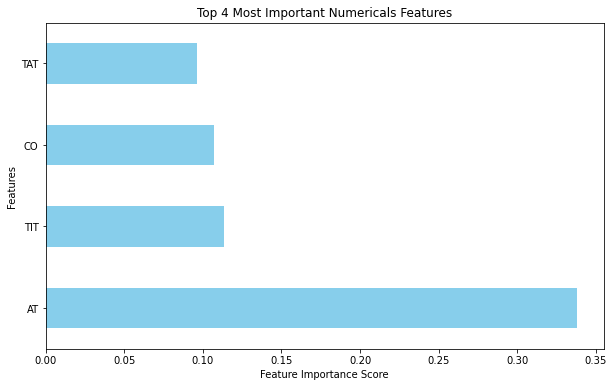

Liste des features les plus importantes: ['AT', 'TIT', 'CO', 'TAT']


In [140]:
def plot_top_features(data, target_column, numerical_columns, threshold=0.30, return_features_list=False):
    """
    Plot the top N most important features based on feature importance scores from an Extra Trees Regressor model.
    
    Args:
    data (DataFrame): The DataFrame containing the data.
    target_column (str): The name of the target column.
    numerical_columns (list): List of numerical column names in the data.
    threshold (float, optional): The threshold for feature importance. Features with importance scores above this threshold will be considered.
    return_features_list (bool, optional): If True, return the list of the most important feature names.
    """
    # Extract numerical features and target variable
    X, y = data[numerical_columns], data[target_column]
    
    # Create an Extra Trees Regressor model
    model = ExtraTreesRegressor()
    
    # Fit the model to the data
    model.fit(X, y)
    
    # Calculate feature importances using the trained model
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    
    # Select features above the threshold
    selected_features = feat_importances[feat_importances > threshold]
    
    num_features = len(selected_features)
    
    # Select the top N most important features
    top_features = selected_features.nlargest(num_features)
    
    # Plot the top N most important features in a horizontal bar chart
    plt.figure(figsize=(10, 6))
    top_features.plot(kind="barh", color="skyblue")
    plt.title(f"Top {num_features} Most Important Numericals Features")
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.show()
    
    if return_features_list:
        return top_features.index.tolist()

# Exemple d'utilisation :
features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO']
important_features = plot_top_features(numeric_data, 'NOX', features, threshold=0.095, return_features_list=True)

print("Liste des features les plus importantes:", important_features)

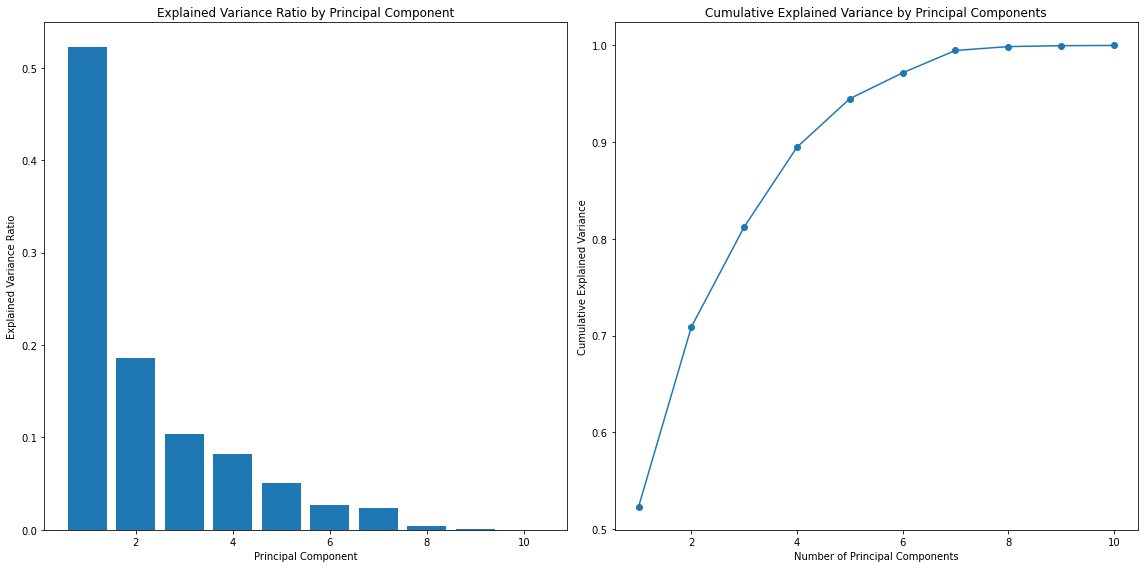

In [105]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extract numerical features and target variable
numerical_columns = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO']
target_column = 'NOX'

X_data, y_data = numeric_data[numerical_columns], numeric_data[target_column]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a 2x1 grid of subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot the explained variance ratio in the first subplot
ax1.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
ax1.set_xlabel("Principal Component")
ax1.set_ylabel("Explained Variance Ratio")
ax1.set_title("Explained Variance Ratio by Principal Component")

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance in the second subplot
ax2.plot(
    range(1, len(cumulative_explained_variance) + 1),
    cumulative_explained_variance,
    marker="o",
)
ax2.set_xlabel("Number of Principal Components")
ax2.set_ylabel("Cumulative Explained Variance")
ax2.set_title("Cumulative Explained Variance by Principal Components")

# Display the figure
plt.tight_layout()
plt.show()

In [109]:
def apply_pca(X, new_dimension=2):
    """
    Applique l'analyse en composantes principales (PCA) à un ensemble de données.

    :param X: DataFrame, l'ensemble de données
    :param new_dimension: int, la nouvelle dimension souhaitée après PCA
    :return: DataFrame, le DataFrame transformé par PCA
    """
    # Étape 1: Standardisation des données
    std = StandardScaler()
    transformed = std.fit_transform(X)

    # Étape 2: Appliquer l'analyse en composantes principales (PCA)
    pca = PCA(n_components=new_dimension)
    X_pca = pca.fit_transform(transformed)

    # Étape 3: Créer un DataFrame avec les composantes principales
    df_pca = pd.DataFrame(data=X_pca, columns=["X_%s" % x for x in range(new_dimension)])

    # Informations d'impression
    print("Forme originale:   ", X.shape)
    print("Forme transformée:", df_pca.shape)

    return df_pca

# Exemple d'utilisation :
# Supposons que X soit votre DataFrame
new_dimension = 5
result_pca = apply_pca(X_data, new_dimension)

display(result_pca.head())

Forme originale:    (36733, 10)
Forme transformée: (36733, 5)


,X_0,X_1,X_2,X_3,X_4
0,0.215972,1.313919,-0.614080,-1.641178,-0.451021
1,0.257161,1.327445,-0.666192,-1.592369,-0.473274
2,0.179755,1.385609,-0.704143,-1.606837,-0.477811
3,0.188677,1.384257,-0.780109,-1.657390,-0.481587
4,0.242605,1.352076,-0.790351,-1.590308,-0.508972


In [142]:
def creer_modeles_de_base():
    # Liste des modèles de base
    modeles = [ExtraTreesRegressor(), RandomForestRegressor(), DecisionTreeRegressor(), KNeighborsRegressor()]
    return modeles


def split_dataset(X, y, test_size=0.2, random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, 
                                                        shuffle=True,random_state=random_state)
    return X_train, X_test, y_train, y_test


def evaluate_regressors(X, y, regressors, threshold=0.30, random_state=402):
    results = []
    
    X_train, X_test, y_train, y_test = split_dataset(X, y, threshold,random_state)
    
    for model in regressors:
        start = time()
        model.fit(X_train, y_train)
        train_time = time() - start
        start = time()
        y_pred_arr = model.predict(X_test)
        y_pred = [round(x, 0) for x in y_pred_arr]
        predict_time = time() - start 
        explained_variance = explained_variance_score(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results.append({
            'Model': str(model),
            'R2 Score': r2,
            #'Training Time': train_time,
            #'Prediction Time': predict_time,
            'Expl. Variance': explained_variance
        })
    
    # Créez un DataFrame à partir des résultats
    results_df = pd.DataFrame(results)
    
    # Affichez les résultats sous forme de tableau
    display(results_df)

In [ ]:
target = 'NOX'
best_features = ['AT','TIT','CO']

In [143]:
# Liste des modèles de base
regressors = creer_modeles_de_base()

# Utilisation de la fonction
X, y, threshold = numeric_data[features], numeric_data[target], 0.30

evaluate_regressors(X, y, regressors)

,Model,R2 Score,Expl. Variance
0,ExtraTreesRegressor(),0.903222,0.903250
1,RandomForestRegressor(),0.881848,0.881879
2,DecisionTreeRegressor(),0.750238,0.750292
3,KNeighborsRegressor(),0.804023,0.804941


In [144]:
# Liste des modèles de base
regressors = creer_modeles_de_base()

# Utilisation de la fonction
X, y, threshold = numeric_data[important_features], numeric_data[target], 0.30

evaluate_regressors(X, y, regressors)

,Model,R2 Score,Expl. Variance
0,ExtraTreesRegressor(),0.733246,0.733250
1,RandomForestRegressor(),0.734025,0.734042
2,DecisionTreeRegressor(),0.509516,0.509546
3,KNeighborsRegressor(),0.704028,0.704154


In [130]:
# Liste des modèles de base
regressors = creer_modeles_de_base()

# Utilisation de la fonction
X, y, threshold = result_pca, numeric_data[target], 0.30

evaluate_regressors(result_pca, y, regressors)

,Model,R2 Score,Expl. Variance
0,ExtraTreesRegressor(),0.752795,0.752865
1,RandomForestRegressor(),0.729350,0.729409
2,DecisionTreeRegressor(),0.470783,0.470799
3,KNeighborsRegressor(),0.730045,0.731060


In [227]:
# Liste des modèles de base
regressors = creer_modeles_de_base()

# Utilisation de la fonction
X, y, threshold = numeric_data[resultat_liste1], numeric_data[target], 0.30 #resultat_liste1

evaluate_regressors(X, y, regressors)

,Model,R2 Score,Expl. Variance
0,ExtraTreesRegressor(),0.882415,0.882429
1,RandomForestRegressor(),0.862728,0.862761
2,DecisionTreeRegressor(),0.709175,0.709330
3,KNeighborsRegressor(),0.752589,0.753544


In [226]:
# Liste des modèles de base
regressors = creer_modeles_de_base()

# Utilisation de la fonction
X, y, threshold = numeric_data[resultat_liste2], numeric_data[target], 0.30

evaluate_regressors(X, y, regressors)

,Model,R2 Score,Expl. Variance
0,ExtraTreesRegressor(),0.864245,0.864253
1,RandomForestRegressor(),0.846422,0.846433
2,DecisionTreeRegressor(),0.673174,0.673174
3,KNeighborsRegressor(),0.676807,0.677915


In [202]:
# Liste des modèles de base
regressors = creer_modeles_de_base()

# Utilisation de la fonction
X, y, threshold = numeric_data[selected_features], numeric_data[target], 0.30

evaluate_regressors(X, y, regressors)

,Model,R2 Score,Expl. Variance
0,ExtraTreesRegressor(),0.825226,0.825243
1,RandomForestRegressor(),0.809396,0.809405
2,DecisionTreeRegressor(),0.600878,0.600885
3,KNeighborsRegressor(),0.659820,0.660954


In [ ]:
data_clean =  numeric_data[liste_features2]

In [231]:
import joblib

def sauvegarder_modele(model, dossier, nom_fichier):
    """
    Sauvegarde un modèle dans un dossier spécifique.

    Args:
    model: Le modèle que vous souhaitez sauvegarder.
    dossier (str): Le nom du dossier où le modèle sera sauvegardé.
    nom_fichier (str): Le nom du fichier de sauvegarde.
    """
    chemin_complet = f"{dossier}/{nom_fichier}"

    # Créer le dossier s'il n'existe pas encore
    try:
        os.makedirs(dossier)
    except FileExistsError:
        pass

    # Sauvegarder le modèle dans le dossier spécifié
    joblib.dump(model, chemin_complet)
    print(f"Le modèle a été sauvegardé avec succès dans '{chemin_complet}'.")


modele_entrene = model # Remplacez cela par votre propre modèle entraîné
dossier_sauvegarde = "Models"
nom_fichier_sauvegarde = "modele_entrene.joblib"

#sauvegarder_modele(modele_entrene, dossier_sauvegarde, nom_fichier_sauvegarde)


In [ ]:
def charger_diviser_enregistrer_dataset(df, save_path, test_size=0.2, random_state=42):
    """
    recois un dataset, le divise en ensembles d'entraînement et de test, affiche les dimensions,
    puis enregistre les ensembles dans des fichiers CSV.

    Args:
    dataset_path (str): Le chemin du fichier CSV contenant le dataset.
    save_path (str): Le chemin du répertoire où les fichiers CSV seront enregistrés.
    test_size (float, optional): La proportion d'échantillons à inclure dans l'ensemble de test.
    random_state (int, optional): La graine utilisée par le générateur de nombres pseudo-aléatoires.

    Returns:
    DataFrame: L'ensemble d'entraînement.
    DataFrame: L'ensemble de test.
    """

    # Diviser le dataset en train et test
    train_df, test_df = train_test_split(df, test_size=test_size, random_state=random_state, shuffle=True)

    # Afficher les dimensions de chaque ensemble de données
    print("Dimensions de data_train : ", train_df.shape)
    print("Dimensions de data_test : ", test_df.shape)

    # Enregistrer les datasets dans des fichiers CSV
    train_df.to_csv(save_path + "data_train.csv", index=False)
    test_df.to_csv(save_path + "data_test.csv", index=False)


save_path = "/Users/surelmanda/Downloads/AirGUARD/Gas_Turbine_Streaming/data/"

train_data, test_data = charger_diviser_enregistrer_dataset(data_clean, save_path)


# Hyperparameter tuning with Random search

In [146]:
def afficher_parametres_actuels():
    """
    Affiche les paramètres actuels du modèle ExtraTreesRegressor.
    """
    model = ExtraTreesRegressor(random_state=0)
    print('Paramètres actuellement utilisés:\n')
    pprint(model.get_params())

def definir_grille_recherche_aleatoire():
    """
    Définit la grille de recherche aléatoire pour l'optimisation des hyperparamètres.
    """
    n_estimators = [int(x) for x in np.linspace(start=50, stop=500, num=3)]
    max_features = ['auto', 'sqrt', 'log2']
    max_depth = [int(x) for x in np.linspace(10, 200, num=3)]
    max_depth.append(None)
    min_samples_split = [2, 5, 10]
    min_samples_leaf = [1, 2, 4]
    bootstrap = [True, False]
    criterion = ['friedman_mse', 'squared_error', 'mse']

    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap,
                   'criterion': criterion
                  }
    print("Grille Hyperparamétrique Aléatoire")
    pprint(random_grid)
    return random_grid

def effectuer_recherche_aleatoire_hyperparametres(model, param_grid, X_train, y_train):
    """
    Effectue une recherche aléatoire des hyperparamètres pour ExtraTreesRegressor.

    Args:
    model: L'estimateur à ajuster (dans ce cas, ExtraTreesRegressor).
    param_grid: Grille des hyperparamètres à échantillonner.
    X_train: Les features d'entraînement.
    y_train: La variable cible d'entraînement.
    """
    rf_random = RandomizedSearchCV(estimator=model, 
                                   param_distributions=param_grid,
                                   scoring='r2', 
                                   n_iter=100, 
                                   cv=3, 
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

    print("Entraîner le modèle avec la grille:")
    rf_random.fit(X_train, y_train)

    print("Meilleurs hyperparamètres:")
    pprint(rf_random.best_params_)

# Exemple d'utilisation :
# Assurez-vous d'avoir défini X_train_Sc et y_train
# Fonction 1: afficher_parametres_actuels()
# Fonction 2: param_grid = definir_grille_recherche_aleatoire()
# Fonction 3: effectuer_recherche_aleatoire_hyperparametres(ExtraTreesRegressor(random_state=0), param_grid, X_train_Sc, y_train)


In [ ]:
print("--- Part 1: Train model without setting hyperparameters:")
rnf = ExtraTreesRegressor(random_state=0)
rnf.fit(X_train_Sc, y_train)
y_preds = rnf.predict(X_test_Sc)
print("MSE(base_model) : {:.3f} ".format(mean_squared_error(y_test, y_preds)))
print("R2 score(base_model) : {:.3f} ", r2_score(y_test, y_preds))

print("--- Part 2: Train model with hyperparameters:")
best_random = rf_random.best_estimator_
best_random.fit(X_train_Sc, y_train)
y_pred = best_random.predict(X_test_Sc)
print("MSE(best_model) : {:.3f} ".format(mean_squared_error(y_test, y_pred)))
print("R2 score(best_model) : {:.3f} ", r2_score(y_test, y_pred))